# Proyek Analisis Data: Nama dataset
- Nama: Naufal Rasyid Sutansyah
- Email:naufal.sutansyah@gmail.com
- Id Dicoding:naufalrasyid

## Menentukan Pertanyaan Bisnis

- Bagaimana suhu 'windspeed' mempengaruhi jumlah rental 'cnt'?
- Kapan rental terbanyak berdasarkan 'season', 'year', 'month', 'weekday', dan 'weathersit' ?

## Menyaipkan semua library yang dibuthkan

In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.7/93.7 kB 2.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import patoolib
import matplotlib.pyplot as plt
import seaborn as sns
import glob

## Data Wrangling

### Gathering Data

In [15]:
!gdown --id 1rl16utNk7SlSuWmQOXHOvvDCF1WPjk6M -O day.csv
!gdown --id 1RPuE7wgFLGNUM1s-kQ_hQP2BJeFy1pz3 -O hour.csv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rl16utNk7SlSuWmQOXHOvvDCF1WPjk6M
To: /content/day.csv
100% 57.6k/57.6k [00:00<00:00, 85.9MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RPuE7wgFLGNUM1s-kQ_hQP2BJeFy1pz3
To: /content/hour.csv
100% 1.16M/1.16M [00:00<00:00, 9.56MB/s]


In [23]:
# List all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Empty list
dfs = []

# Loop through all CSV files
for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dfs.append(df)

# Concatenate all DataFrames into one
df = pd.concat(dfs, ignore_index=True)

# Display the combined dataset
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.240000,0.287900,0.810000,0.000000,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.220000,0.272700,0.800000,0.000000,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.220000,0.272700,0.800000,0.000000,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.240000,0.287900,0.750000,0.000000,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.240000,0.287900,0.750000,0.000000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18105,727,2012-12-27,1,1,12,NaN,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
18106,728,2012-12-28,1,1,12,NaN,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
18107,729,2012-12-29,1,1,12,NaN,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
18108,730,2012-12-30,1,1,12,NaN,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


### Assessing Data

In [ ]:
#menampilkan 5 data awal pada dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0.0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1.0,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2.0,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3.0,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4.0,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     18110 non-null  int64  
 1   dteday      18110 non-null  object 
 2   season      18110 non-null  int64  
 3   yr          18110 non-null  int64  
 4   mnth        18110 non-null  int64  
 5   hr          17379 non-null  float64
 6   holiday     18110 non-null  int64  
 7   weekday     18110 non-null  int64  
 8   workingday  18110 non-null  int64  
 9   weathersit  18110 non-null  int64  
 10  temp        18110 non-null  float64
 11  atemp       18110 non-null  float64
 12  hum         18110 non-null  float64
 13  windspeed   18110 non-null  float64
 14  casual      18110 non-null  int64  
 15  registered  18110 non-null  int64  
 16  cnt         18110 non-null  int64  
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB


In [ ]:
#cek kolom dan jumlah dataset
df.shape

(18110, 17)

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
#cek uniqu values pada kolom
df.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp            528
atemp           752
hum             651
windspeed       679
casual          783
registered     1440
cnt            1552
dtype: int64

In [ ]:
#Check values pada semua column
for column in df.columns:
  value = df[column].value_counts()
  print(f"Values count column '{column}': \n{value}\n")

Values count column 'instant': 
1        2
482      2
484      2
485      2
486      2
        ..
6285     1
6286     1
6287     1
6288     1
17379    1
Name: instant, Length: 17379, dtype: int64

Values count column 'dteday': 
2011-01-01    25
2012-04-03    25
2012-04-28    25
2012-04-29    25
2012-04-30    25
              ..
2011-01-26    17
2011-01-18    13
2012-10-30    12
2011-01-27     9
2012-10-29     2
Name: dteday, Length: 731, dtype: int64

Values count column 'season': 
3    4684
2    4593
1    4423
4    4410
Name: season, dtype: int64

Values count column 'yr': 
1    9100
0    9010
Name: yr, dtype: int64

Values count column 'mnth': 
5     1550
7     1550
12    1545
8     1537
3     1535
10    1513
6     1500
4     1497
9     1497
11    1497
1     1491
2     1398
Name: mnth, dtype: int64

Values count column 'hr': 
17.0    730
16.0    730
13.0    729
15.0    729
14.0    729
12.0    728
22.0    728
21.0    728
20.0    728
19.0    728
18.0    728
23.0    728
11.0    727
10.0

In [ ]:
#Cek missing values
df.isna().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
hr            731
holiday         0
weekday         0
workingday      0
weathersit      0
temp            0
atemp           0
hum             0
windspeed       0
casual          0
registered      0
cnt             0
dtype: int64

**Hasil cek missing values :**

---

terdapat missing values pada kolom hr dengan jumlah 731

In [ ]:
#Cek duplicated data
df.duplicated().sum()

0

Tidak ada duplicated data pada dataset

Cek outliers

In [ ]:
df['cnt'].unique()

array([  16,   40,   32, ..., 1341, 1796, 2729])

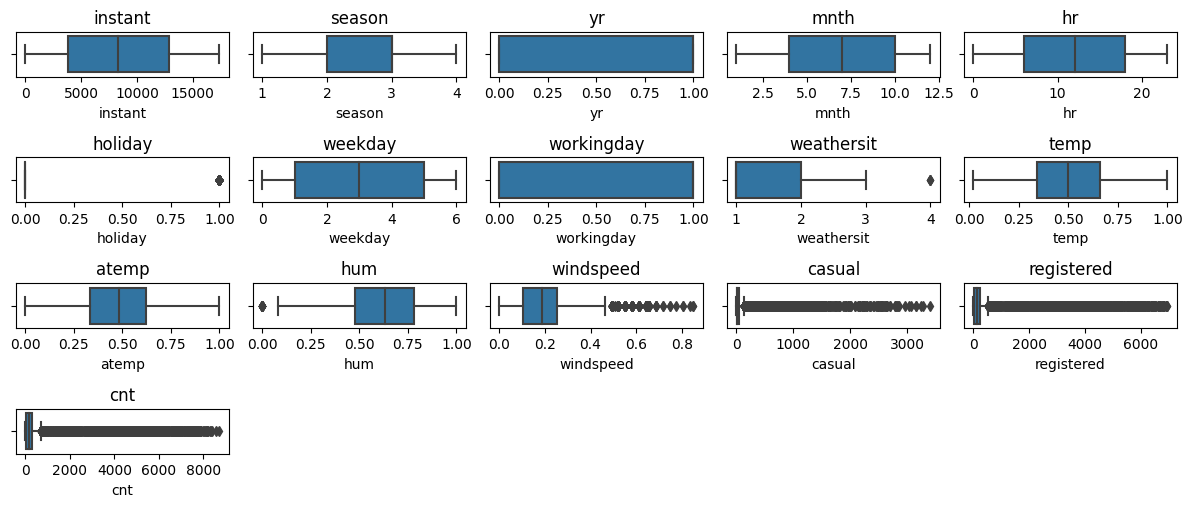

In [ ]:
#Cek outliers
num_cols = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))
for i,col in enumerate (num_cols.columns):
  plt.subplot(5, 5, i + 1)  # Index starts from 1 in subplot
  sns.boxplot(x=num_cols[col])
  plt.title(col)

plt.tight_layout()
plt.show()

Pada hasil diatas didapat bahwa terdapat outlier pada column 'weathersit', 'hum', 'windspeed', 'casual', 'registerd', 'cnt',

**Kesimpulan**

---



*   Terdapat missing values 'hr' sebanyak 731
*   Terdapat outlier pada column 'holiday', 'weatherit', 'hum', 'windspeed', 'casual', 'registerd', 'cnt',



### Cleaning Data

In [ ]:
df.shape

(18110, 17)

Disini saya memutuskan untuk mengisi missing data menggunakan mean, karena menurut saya setiap informasi berharga

In [ ]:
df.hr.fillna(value=df.hr.mean(),inplace=True)

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dapat dilihat dataset sudah tidak mengandung missing values, lalu kita ketahap selanjutnya

Delete outliers menggunakan z score method

In [ ]:
mean = np.mean(df)
std = np.std(df)
print('mean of the dataset is\n', mean)
print('\nstd. deviation is', std)

mean of the dataset is
 instant       8354.006405
season           2.501436
yr               0.502485
mnth             6.537051
hr              11.546752
holiday          0.028769
weekday          3.003424
workingday       0.682772
weathersit       1.424075
temp             0.496922
atemp            0.475718
hum              0.627256
windspeed        0.190113
casual          68.472336
registered     295.158697
cnt            363.631033
dtype: float64

std. deviation is instant       5180.628822
season           1.107014
yr               0.499994
mnth             3.439118
hr               6.773225
holiday          0.167156
weekday          2.005621
workingday       0.465397
weathersit       0.635812
temp             0.192172
atemp            0.171492
hum              0.191142
windspeed        0.120848
casual         216.582074
registered     771.533839
cnt            950.801702
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3571: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only vali

In [ ]:
from scipy.stats import zscore

In [ ]:
#memasukan data yh sudah di bersihkan ke variable df_clean
from scipy.stats import zscore
z_col = ['weathersit', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

#zscore method untuk handle outliers
z_scores = zscore(df[z_col])
outliers = (np.abs(z_scores) > 3)
outliers.sum()

weathersit      3
hum            23
windspeed     107
casual        365
registered    537
cnt           542
dtype: int64

Output pada kode diatas menghasilkan jumlah outlier pada setiap column yang diatas treshold 3

In [ ]:
#Mengganti outliers menggunakan metode imputation dengan median
median = df[z_col].median()
df[z_col] = np.where(outliers, median, df[z_col])

In [ ]:
#cek outliers yang sudah dibersihkan
z_scores = zscore(df[z_col])
outliers = (np.abs(z_scores) > 3)
outliers.sum()

weathersit      0
hum             0
windspeed      39
casual        340
registered    185
cnt           170
dtype: int64

bisa dilihat setelah dibersihkan outliers berkurang secara drastis dari hasil sebelumnya

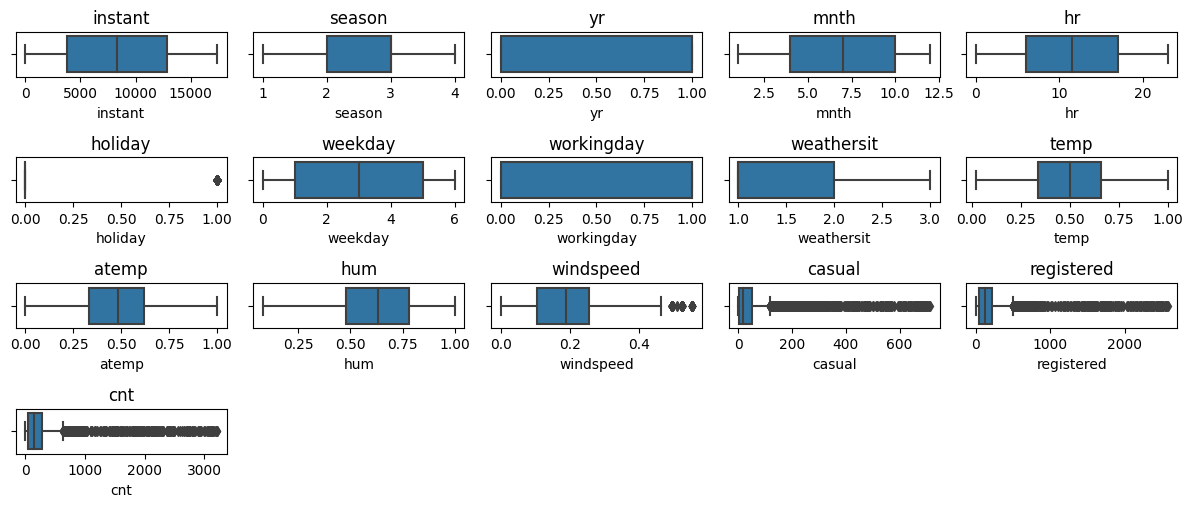

In [ ]:
#Cek outliers
num_cols = df.select_dtypes(include=["number"])
plt.figure(figsize=(12,6))
for i,col in enumerate (num_cols.columns):
  plt.subplot(5, 5, i + 1)  # Index starts from 1 in subplot
  sns.boxplot(x=num_cols[col])
  plt.title(col)

plt.tight_layout()
plt.show()

## Exploratory Data Analysis (EDA)

In [ ]:
#summary statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,18110.0,8354.006405,5180.771860,1.00,3797.2500,8324.500000,12851.7500,17379.0000
season,18110.0,2.501436,1.107045,1.00,2.0000,3.000000,3.0000,4.0000
yr,18110.0,0.502485,0.500008,0.00,0.0000,1.000000,1.0000,1.0000
mnth,18110.0,6.537051,3.439213,1.00,4.0000,7.000000,10.0000,12.0000
hr,18110.0,11.546752,6.773412,0.00,6.0000,11.546752,17.0000,23.0000
holiday,18110.0,0.028769,0.167160,0.00,0.0000,0.000000,0.0000,1.0000
weekday,18110.0,3.003424,2.005677,0.00,1.0000,3.000000,5.0000,6.0000
workingday,18110.0,0.682772,0.465410,0.00,0.0000,1.000000,1.0000,1.0000
weathersit,18110.0,1.423578,0.634988,1.00,1.0000,1.000000,2.0000,3.0000
temp,18110.0,0.496922,0.192177,0.02,0.3400,0.500000,0.6600,1.0000


In [ ]:
#Cek korelasi
df.corr().T

<ipython-input-33-780477949831>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().T


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.376402,0.806448,0.455668,-0.004530,0.013725,0.001460,-0.003352,-0.010054,0.127555,0.128904,0.003269,-0.069684,-0.025205,0.069045,0.073596
season,0.376402,1.000000,-0.010382,0.830429,-0.005991,-0.009623,-0.002365,0.013692,-0.012295,0.312868,0.320265,0.147403,-0.141276,0.078657,0.069786,0.071021
yr,0.806448,-0.010382,1.000000,-0.010121,-0.003788,0.006743,-0.004524,-0.002189,-0.020447,0.041170,0.039485,-0.089067,-0.009823,0.074463,0.119293,0.130224
mnth,0.455668,0.830429,-0.010121,1.000000,-0.005653,0.018461,0.010365,-0.003576,0.007997,0.202395,0.208829,0.162737,-0.130625,0.052435,0.049571,0.049502
hr,-0.004530,-0.005991,-0.003788,-0.005653,1.000000,0.000469,-0.003427,0.002239,-0.019941,0.135064,0.131293,-0.274872,0.133887,0.204510,0.247672,0.264748
holiday,0.013725,-0.009623,0.006743,0.018461,0.000469,1.000000,-0.102083,-0.252494,-0.017524,-0.027386,-0.031030,-0.011535,0.005816,0.021890,-0.020996,-0.011066
weekday,0.001460,-0.002365,-0.004524,0.010365,-0.003427,-0.102083,1.000000,0.035948,0.004151,-0.001731,-0.008770,-0.035727,0.009401,0.015044,0.009071,0.019865
workingday,-0.003352,0.013692,-0.002189,-0.003576,0.002239,-0.252494,0.035948,1.000000,0.045304,0.055282,0.054568,0.018909,-0.009036,-0.175804,0.069876,0.013548
weathersit,-0.010054,-0.012295,-0.020447,0.007997,-0.019941,-0.017524,0.004151,0.045304,1.000000,-0.102065,-0.104873,0.434766,0.021080,-0.098602,-0.061104,-0.073470
temp,0.127555,0.312868,0.041170,0.202395,0.135064,-0.027386,-0.001731,0.055282,-0.102065,1.000000,0.987819,-0.066997,-0.020243,0.282743,0.165636,0.202899


<ipython-input-34-47f5e7c89c25>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


<Axes: >

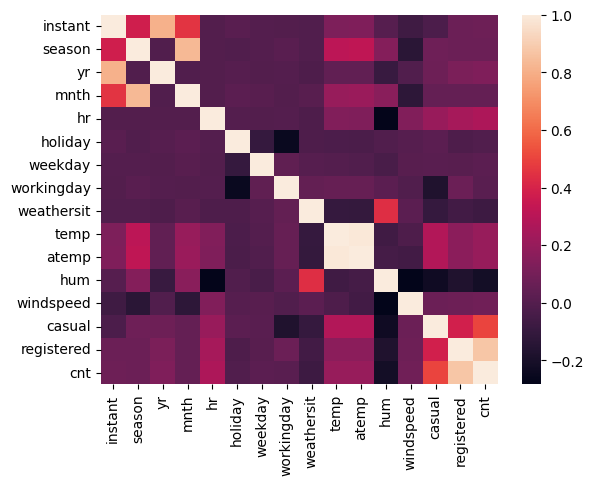

In [ ]:
cor=df.corr()
sns.heatmap(cor)

### Explore ...

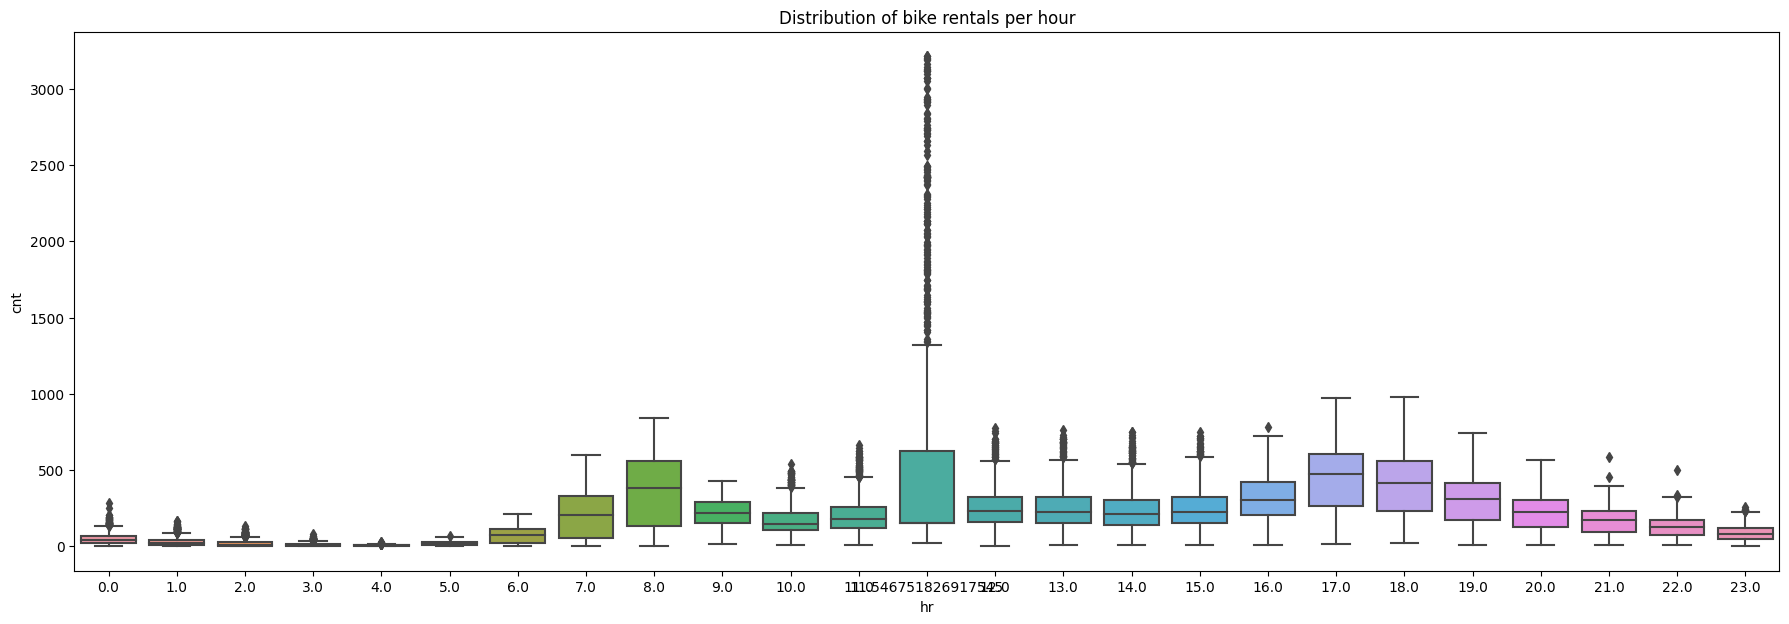

In [ ]:
plt.figure(figsize=(22,7))
hour = sns.boxplot(x='hr', y='cnt', data=df)
plt.title('Distribution of bike rentals per hour')
for i in hour.containers:
    hour.bar_label(i,)
plt.show()

orang orang yang menyewa sepeda cenderung dimulai pada jam 6 dan di akhiri penurunan mualu di jam 19.00. Maka dapat disimpulkan penyewa cenderung aktif di waktu jam sibuk kerja dan mengalami penurunan ketika dijam pulang kerja

## Visualization & Explanatory Analysis

### Pertanyaan 1:

**Kapan rental terbanyak berdasarkan 'season', 'year', 'month', 'weekday', dan 'weathersit' ?**

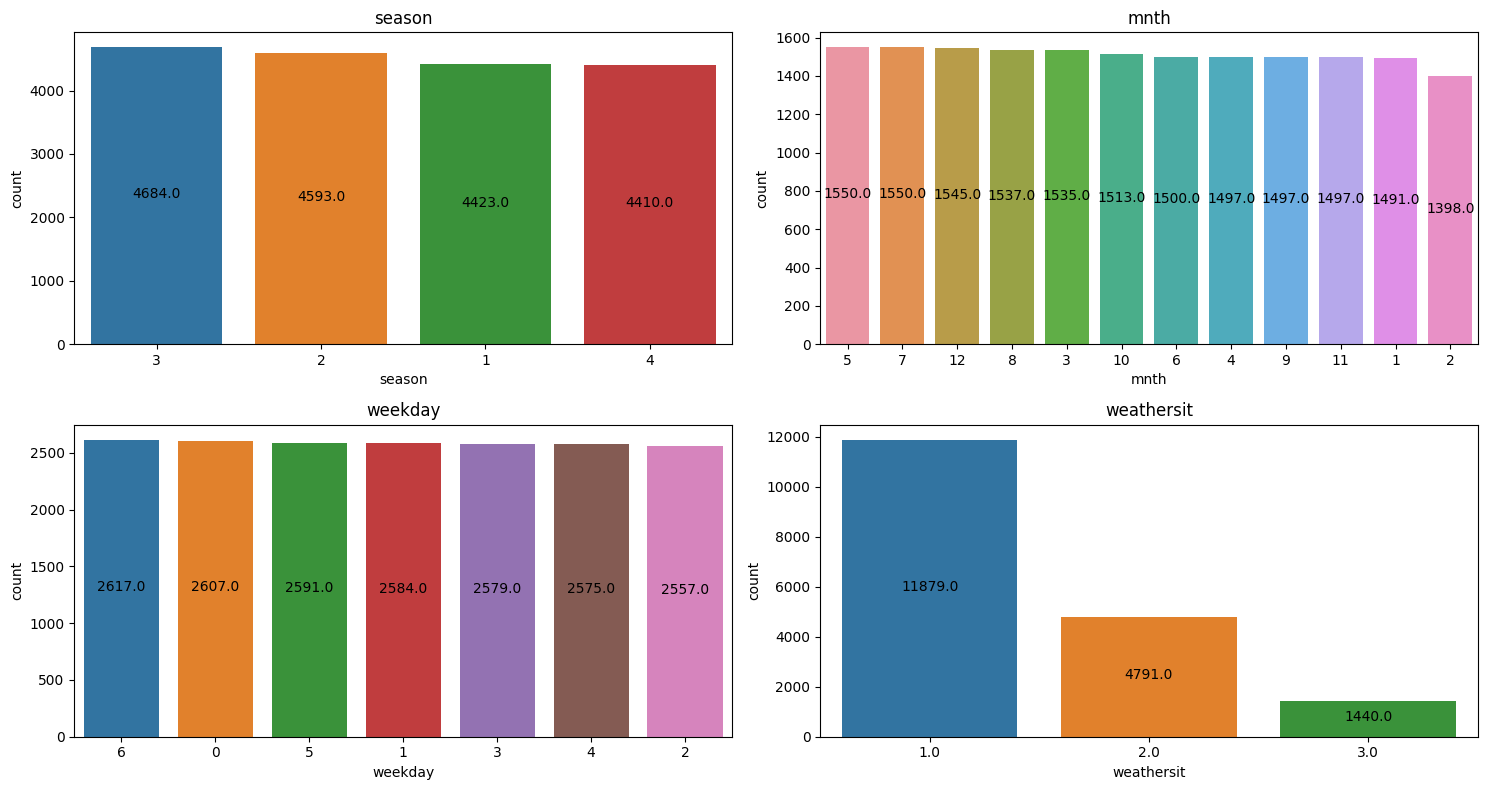

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns
sale = ['season', 'mnth', 'weekday', 'weathersit']

plt.figure(figsize=(15, 6 * len(sale) // 3))

for i, col in enumerate(sale):
    ax = plt.subplot(len(sale) // 3 + 1, 2, i + 1)
    sns.countplot(x=col, order=df[col].value_counts().index, data=df)
    plt.title(col)

    # count  each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()/2),
                    ha='center', va='center', xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.show()


*   Rental terbanyak terdapat pada musim 3 sebanyak 4684 rental
*   Rental terbanyak terdapat pada bulan 5, 7 sebanyak 1550 dan bulan 12 sebanyak 1545
*  Rental terbanyak terdapat pada minggu 7 sebanyak 2617 rental karena disini 1 mulai dari 0, lalu didapat juga bahwa hari berbeda tidak terlalu mempunyai perbedaan signifikan pada kenaikan rental sepeda, bisa diartikan bahwa hari tidak terlalu mempengaruhi rental.
*   Rental terbanyak terdapat pada cuaca 1 sebanyak 11879 rental


### Pertanyaan 2:

**Bagaimana suhu 'windspeed' mempengaruhi jumlah rental 'cnt'?**

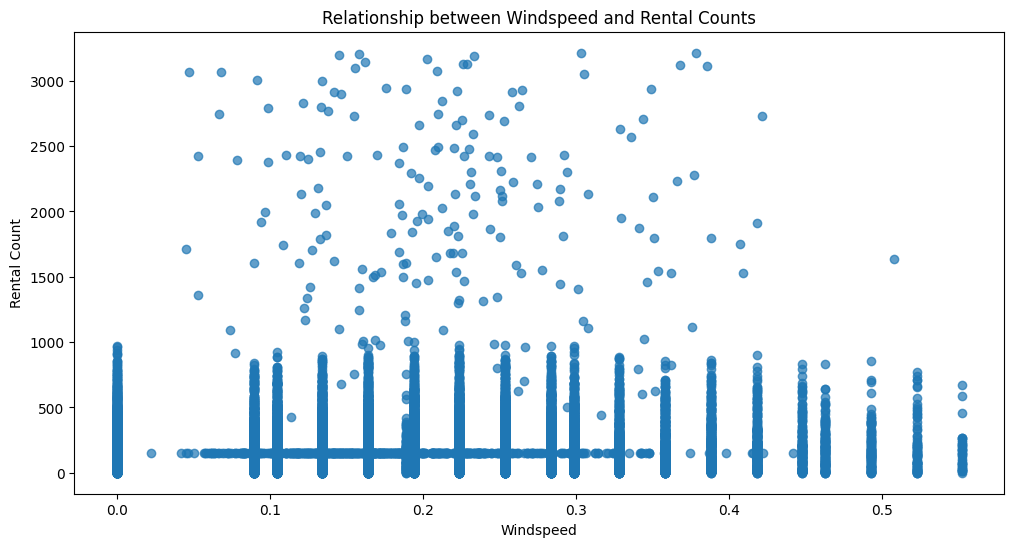

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of Windspeed vs. Rental Counts
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['windspeed'], df['cnt'], alpha=0.7)

# Adding labels and title
plt.title('Relationship between Windspeed and Rental Counts')
plt.xlabel('Windspeed')
plt.ylabel('Rental Count')

# Show the plot
plt.show()


Dari hasil diatas didapat kecepatan angin yang lebih tinggi bukanlah kondisi yang menguntungkan untuk menyewa sepeda. Sebaliknya, kecepatan angin yang lebih rendah akan menghasilkan cuaca yang lebih hangat dan menyenangkan, sehingga lebih banyak penyewaan sepeda.

## Conclusion

**- Conclution pertanyaan 1**

*   Rental terbanyak terdapat pada musim 3 sebanyak 4684 rental
*   Rental terbanyak terdapat pada bulan 5, 7 sebanyak 1550 dan bulan 12 sebanyak 1545
*  Rental terbanyak terdapat pada minggu 7 sebanyak 2617 rental karena disini 1 mulai dari 0, lalu didapat juga bahwa hari berbeda tidak terlalu mempunyai perbedaan signifikan pada kenaikan rental sepeda, bisa diartikan bahwa hari tidak terlalu mempengaruhi rental.
*   Rental terbanyak terdapat pada cuaca 1 sebanyak 11879 rental

**- Conclution pertanyaan 2**
* Dari hasil diatas didapat kecepatan angin yang lebih tinggi bukanlah kondisi yang menguntungkan untuk menyewa sepeda. Sebaliknya, kecepatan angin yang lebih rendah akan menghasilkan cuaca yang lebih hangat dan menyenangkan, sehingga lebih banyak penyewaan sepeda.

  save clean dataset untuk Dasboard Streamlit

In [ ]:
df.to_csv("df_clean.csv", encoding = 'utf-8')

In [ ]:
!pip install pipreqs

In [ ]:
!pipreqs .

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in ./requirements.txt
